<h1> Previsão de Séries Temporais de Ações </h1>

1.   Prophet



In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# Séries Temporais - Valores ao longo do tempo:
from prophet import Prophet

In [9]:
#Baixando os dados do Yahoo Finance
dados = yf.download('JNJ', start='2020-01-01', end='2023-12-31', progress=False)
#progress = carregando false - não mostra a porcentagem ao carregar os dados
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099091,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592819,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216782,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198959,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [3]:
# Dividir os dados em **treino** (até o final do primeiro semestre de 2023) e **teste** (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [4]:
# Preparando os dados para o FBProphet - Nomeclatura obrigatória: Treinamento em ds e o que está tentando advinhar é y
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [5]:
# Criar e treinar o modelo
#Prophet -> método com a sazonalidade

modelo = Prophet(weekly_seasonality=True, #Padrões que ocorrem semanalmente
                  yearly_seasonality=True, #Padrões anuais
                  daily_seasonality=False) # Padrões diários

# Adiciona os feriados
modelo.add_country_holidays(country_name='US')

# Aprenda tudo sobre esses dados: - Se ajuste com essa base de dados
modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprsu87lrb/8tp0dg8d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsu87lrb/c4p302w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20992', 'data', 'file=/tmp/tmprsu87lrb/8tp0dg8d.json', 'init=/tmp/tmprsu87lrb/c4p302w9.json', 'output', 'file=/tmp/tmprsu87lrb/prophet_modelw29o1orx/prophet_model-20240401003749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# Criar datas futuras para previsão até o final de 2023

# Período quer prever no futuro:
futuro = modelo.make_future_dataframe(periods=150)
# Fazer uma previsão em cima do futuro
previsao = modelo.predict(futuro)

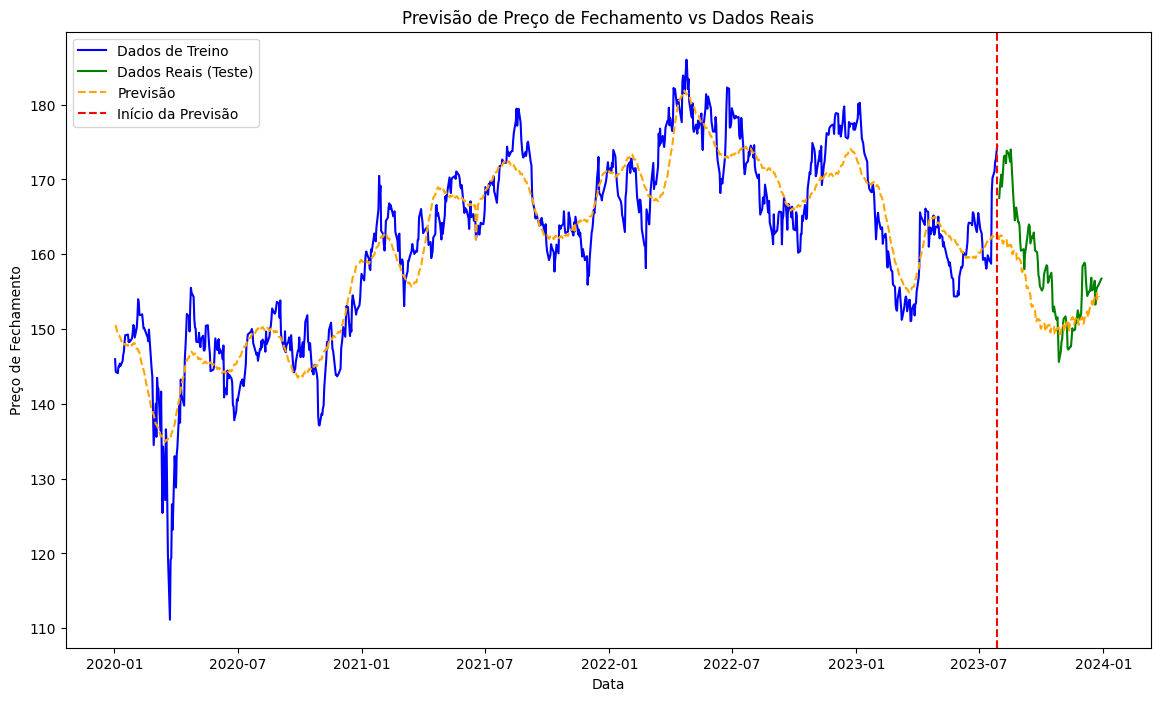

In [7]:
# Plotar os dados de treino, teste e previsões

plt.figure(figsize=(14, 8))
# Definindo X e Y:
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
# A previsão:
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

# Dados de treino máximo - Linha traçada que daq p frente é previsão
plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
#
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

In [27]:
dados = yf.download('PETR4.SA', start='2020-01-01', end='2023-12-31', progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,30.510000,30.700001,30.309999,30.700001,12.062726,37774500
1,2020-01-03,30.879999,31.240000,30.450001,30.450001,11.964496,71595600
2,2020-01-06,30.430000,30.940001,29.950001,30.809999,12.105947,81844000
3,2020-01-07,30.820000,30.879999,30.469999,30.690001,12.058797,32822000
4,2020-01-08,30.690001,30.770000,30.240000,30.500000,11.984141,48215600
...,...,...,...,...,...,...,...
988,2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
989,2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
990,2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800
991,2023-12-27,37.320000,37.430000,37.130001,37.360001,37.360001,19588500


In [28]:
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [29]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,30.700001
1,2020-01-03,30.450001
2,2020-01-06,30.809999
3,2020-01-07,30.690001
4,2020-01-08,30.500000
...,...,...
884,2023-07-24,30.299999
885,2023-07-25,31.000000
886,2023-07-26,31.000000
887,2023-07-27,29.389999


In [43]:
modelo = Prophet(weekly_seasonality=True,
                  yearly_seasonality=True,
                  daily_seasonality=True)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprsu87lrb/5n7qp6j6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsu87lrb/_ztq0x9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14585', 'data', 'file=/tmp/tmprsu87lrb/5n7qp6j6.json', 'init=/tmp/tmprsu87lrb/_ztq0x9a.json', 'output', 'file=/tmp/tmprsu87lrb/prophet_modelfnl2y_mw/prophet_model-20240401014333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:43:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:43:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [45]:
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

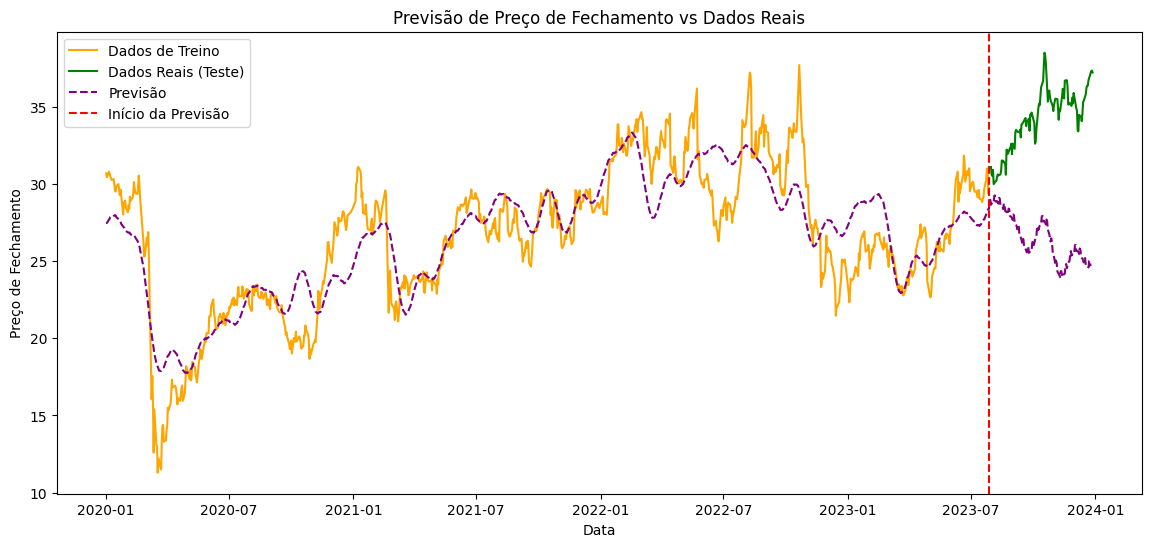

In [46]:
plt.figure(figsize=(14, 6))

# dados treino
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='orange')
# dados teste
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')

# Previsão:
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='purple', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()